In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

import qutip as qt

import time

from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

In [3]:
"""
Protocol 1:
"""
def delta_p1(t, args={}):
    val =  5.11 + 0.038*np.exp(21.52*(t - 0.5)**2)
    return val
def delta1(t, args={}):
    val = 0.29*(t - 0.5) + np.random.uniform(-1,1)
    return val

"""
Protocol 2:
"""
def delta_p2(t, args={}):
    val = 26.50*(t - 0.5) - 87.25*(t - 0.5)**3 + 312.08*(t - 0.5)**5 
    return val 

def delta2(t, args={}):
    val = 0.19 - 0.37*(t - 0.5)**2 - 4.85*(t - 0.5)**4 
    return val 

In [4]:
"""
Inclusion of pure dephasing:
"""

def dephasing_evolution(gamma_list, omega = 40.):
    ev_times = np.linspace(0,1,50)
    init_sate = qt.fock_dm(3,0,0)

    coupling_H = omega*0.5*( qt.projection(3,0,1)  + qt.projection(3,1,0) + 
                  qt.projection(3,1,2)  + qt.projection(3,2,1) )

    single_photon_H = omega*qt.projection(3,1,1)
    two_photon_H = omega*qt.projection(3,2,2)
    #Define the gammas in terms of gamma_g etc...

    gammas = omega*gamma_list


    # Collapse ops
    gamma1 = np.sqrt(gammas[0])*qt.projection(3,0,0)
    gamma2 = np.sqrt(gammas[1])*qt.projection(3,1,1)
    gamma3 = np.sqrt(gammas[2])*qt.projection(3,2,2)
    def delta_p1(t, args={}):
        val =  5.11 + 0.038*np.exp(21.52*(t - 0.5)**2)
        return val
    def delta1(t, args={}):
        val = 0.29*(t - 0.5)
        return val
    def delta_p2(t, args={}):
        val = 26.50*(t - 0.5) - 87.25*(t - 0.5)**3 + 312.08*(t - 0.5)**5 
        return val 
    def delta2(t, args={}):
        val = 0.19 - 0.37*(t - 0.5)**2 - 4.85*(t - 0.5)**4 
        return val 
    resultsproto1 = qt.mesolve(H=[coupling_H, [single_photon_H, delta_p1], [two_photon_H, delta1]], 
                        rho0=init_sate, tlist=ev_times, c_ops=[gamma1, gamma2, gamma3])
    resultsproto2 = qt.mesolve(H=[coupling_H, [single_photon_H, delta_p2], [two_photon_H, delta2]], 
                        rho0=init_sate, tlist=ev_times, c_ops=[gamma1, gamma2, gamma3])
    populations = np.zeros((2,len(ev_times),3))
    for i,t in enumerate(ev_times):
        populations[0,i,:] = resultsproto1.states[i].diag()[:]
        populations[1,i,:] = resultsproto2.states[i].diag()[:]
        
    performances = np.array([populations[0,-1,2], populations[1,-1,2]])
    return populations, performances


In [5]:
n=20


gammas = np.linspace(0,0.5,n)
full_populations = np.zeros((n,n,n,2,50,3))
performance_array = np.zeros((n,n,n,2))
for i in range(n):
    for j in range(n):
        for k in range(n):
            g_list = np.array([gammas[i], gammas[j], gammas[k]])
            pops, perfs = dephasing_evolution(g_list)
            full_populations[i,j,k,:,:,:]=pops[:,:,:]
            performance_array[i,j,k,:]=perfs[:]
            
            

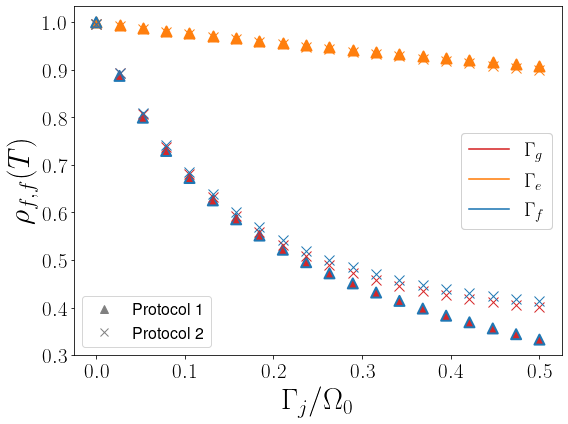

In [7]:
from matplotlib.lines import Line2D

plt.figure(1, figsize=(8,6))
plt.scatter(gammas, performance_array[:,0,0,0], label=r"$\gamma_g$", edgecolors='none',
         linewidth=2.0, s=100, marker="^", facecolors='C3')
plt.scatter(gammas, performance_array[0,:,0,0], label=r"$\gamma_e$", edgecolors='C1',
         linewidth=2.0, s=100, marker="^", facecolors='C1')
plt.scatter(gammas, performance_array[0,0,:,0], label=r"$\gamma_f$", edgecolors ='C0',
         linewidth=2.0, s=100, marker="^", facecolors='none')

plt.scatter(gammas, performance_array[:,0,0,1], color = 'C3',
         linewidth=1, s=100, marker="x")
plt.scatter(gammas, performance_array[0,:,0,1], color='C1',
         linewidth=1, s=100, marker="x")
plt.scatter(gammas, performance_array[0,0,:,1], color='C0',
         linewidth=1, s=100, marker="x")
plt.xlabel(r"$\Gamma_j / \Omega_0$", fontsize='30')
plt.ylabel(r"$\rho_{f,f}(T)$", fontsize='30')
plt.tick_params(labelsize = '21')



legend_elements = [Line2D([], [], marker="^", label=r"Protocol 1",
                          color="grey", linestyle='', markersize=8),
                   Line2D([], [], marker="x", label=r"Protocol 2",
                          color='grey', linestyle='', markersize=8)]

legend1 = plt.legend(handles=legend_elements, loc='lower left', fontsize="16")

plt.gca().add_artist(legend1)

gamma_g = Line2D([], [], color='C3', linestyle='-', label=r"$\Gamma_g$")
gamma_i = Line2D([], [], color='C1', linestyle='-', label=r"$\Gamma_e$")
gamma_t = Line2D([], [], color='C0', linestyle='-', label=r"$\Gamma_f$")
legend2 = plt.legend(handles=[gamma_g, gamma_i, gamma_t], loc='right', fontsize="20")
plt.gca().add_artist(legend2)


plt.tight_layout()
plt.savefig("Plots/dephasing_dependence", dpi=600)

In [ ]:
 qt.projection(3,2,2)

In [16]:
def Hamiltonian(t):
    H = (40*0.5*(qt.projection(3,0,1)  + qt.projection(3,1,0) + 
                  qt.projection(3,1,2)  + qt.projection(3,2,1)) + 
         40*delta_p2(t)*qt.projection(3,1,1) + 40*delta2(t)*qt.projection(3,2,2))
    return H

In [17]:
timez = np.linspace(0,1,1000)
diabatic_energies = np.zeros((len(timez), 3))
eig_vals = np.zeros((len(timez),3))
for i,t in enumerate(timez):
    for j in range(3):
        diabatic_energies[i,j] = qt.expect(Hamiltonian(t),qt.fock(3,j,0))
        eig_vals[i,j] = Hamiltonian(t).eigenenergies()[j]

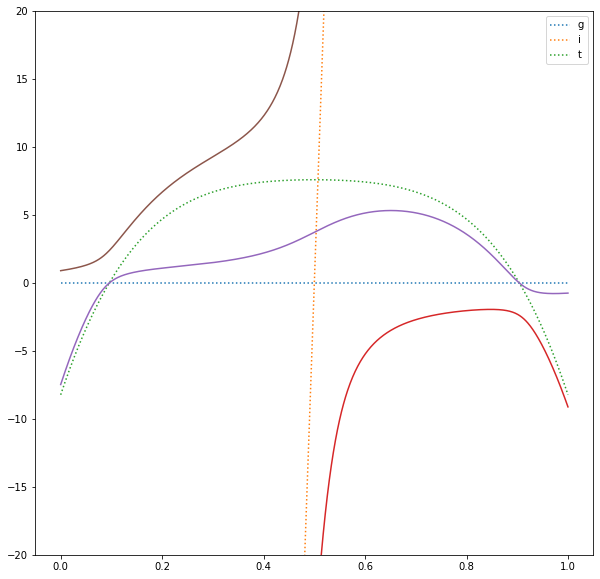

In [18]:
plt.figure(figsize=(10,10))
plt.plot(timez, diabatic_energies[:,0], label=r"g", linestyle=':')
plt.plot(timez, diabatic_energies[:,1], label=r"i", linestyle=':')
plt.plot(timez, diabatic_energies[:,2], label=r"t", linestyle=':')
plt.ylim(-100,100)

plt.plot(timez, eig_vals[:,0])
plt.plot(timez, eig_vals[:,1])
plt.plot(timez, eig_vals[:,2])
plt.ylim(-20,20)
plt.legend()


In [19]:
omega=40
coupling_H = omega*0.5*( qt.projection(3,0,1)  + qt.projection(3,1,0) + 
              qt.projection(3,1,2)  + qt.projection(3,2,1) )

single_photon_H = omega*qt.projection(3,1,1)
two_photon_H = omega*qt.projection(3,2,2)

results = qt.mesolve(H=[coupling_H,[single_photon_H,delta_p2],[two_photon_H, delta2]], rho0=qt.fock_dm(3,0,0),
                    tlist=timez)

In [20]:
states = results.states[:]
qt.expect(Hamiltonian(0.1), states[10])

0.5407631923869461

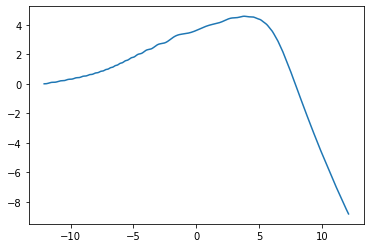

In [21]:
engs= np.zeros(len(timez))
for i,t in enumerate(timez):
    engs[i]=qt.expect(Hamiltonian(t), states[i])
    

plt.plot(np.vectorize(delta_p2)(timez), engs)

In [15]:
states1 = results1.states[:]

NameError: name 'results1' is not defined

In [ ]:
energies=np.zeros(len(timez))
for j,t in enumerate(timez):
    energies[j]=qt.expect((qt.sigmaz() + t*qt.sigmax()),states1[j])

plt.plot(timez, energies)